In [1]:
#using Pkg; Pkg.add("Conda"); Pkg.add("CSV"); Pkg.add("HTTP"); Pkg.add("DataFrames"); Pkg.add("ScikitLearn"); Pkg.add("PyCall")
using Pkg; Pkg.add("ScikitLearn");

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
 Installed CMakeWrapper ──────── v0.2.3
 Installed NBInclude ─────────── v2.1.0
 Installed Distances ─────────── v0.8.2
 Installed RData ─────────────── v0.6.2
 Installed DecisionTree ──────── v0.8.3
 Installed JLD ───────────────── v0.9.1
 Installed NearestNeighbors ──── v0.4.3
 Installed FastGaussQuadrature ─ v0.4.0
 Installed Blosc ─────────────── v0.5.1
 Installed LegacyStrings ─────── v0.4.1
 Installed ScikitLearnBase ───── v0.5.0
 Installed ElasticPDMats ─────── v0.2.1
 Installed HDF5 ──────────────── v0.12.3
 Installed ElasticArrays ─────── v0.4.0
 Installed GaussianMixtures ──── v0.3.0
 Installed CMake ─────────────── v1.1.2
 Installed ScikitLearn ───────── v0.5.1
 Installed Clustering ────────── v0.13.3
 Installed GaussianProcesses ─── v0.9.0
 Installed RDatasets ─────────── v0.6.1
  Updating `~/.julia/environments/v1.2/Projec

In [2]:
using Conda
Conda.runconda(`install mlxtend -c conda-forge -y`)

┌ Info: Running `conda install mlxtend -c conda-forge -y` in root environment
└ @ Conda /home/nakada/.julia/packages/Conda/kLXeC/src/Conda.jl:112


Solving environment: ...working... done

## Package Plan ##

  environment location: /home/nakada/anaconda3/envs/conda_jl

  added / updated specs:
    - mlxtend


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    certifi-2019.6.16          |           py37_1         149 KB  conda-forge
    conda-4.7.11               |           py37_0         3.0 MB  conda-forge
    cycler-0.10.0              |             py_1           8 KB  conda-forge
    dbus-1.13.6                |       he372182_0         602 KB  conda-forge
    expat-2.2.5                |    he1b5a44_1003         191 KB  conda-forge
    fontconfig-2.13.1          |    he4413a7_1000         327 KB  conda-forge
    freetype-2.10.0            |       he983fc9_1         884 KB  conda-forge
    gettext-0.19.8.1           |    hc5be6a0_1002         3.6 MB  co

In [2]:
using CSV, HTTP, DataFrames, ScikitLearn, Random, PyCall, Statistics

In [3]:
dat = HTTP.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
buf = IOBuffer(dat.body[1:end-1]) # 最後の改行文字を切り落とす
iris = CSV.read(buf; header=false)
names!(iris, Symbol.(["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Class"]))


,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
,Float64,Float64,Float64,Float64,String
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [4]:
ua = unique(iris[!, :Class])
iris[!, :Class]=[findfirst(==(x), ua) - 1 for x in iris[!, :Class]]
y = iris[!, :Class]
X = Matrix(iris[!, 1:4])

150×4 Array{Float64,2}:
 5.1  3.5  1.4  0.2
 4.9  3.0  1.4  0.2
 4.7  3.2  1.3  0.2
 4.6  3.1  1.5  0.2
 5.0  3.6  1.4  0.2
 5.4  3.9  1.7  0.4
 4.6  3.4  1.4  0.3
 5.0  3.4  1.5  0.2
 4.4  2.9  1.4  0.2
 4.9  3.1  1.5  0.1
 5.4  3.7  1.5  0.2
 4.8  3.4  1.6  0.2
 4.8  3.0  1.4  0.1
 ⋮                 
 6.0  3.0  4.8  1.8
 6.9  3.1  5.4  2.1
 6.7  3.1  5.6  2.4
 6.9  3.1  5.1  2.3
 5.8  2.7  5.1  1.9
 6.8  3.2  5.9  2.3
 6.7  3.3  5.7  2.5
 6.7  3.0  5.2  2.3
 6.3  2.5  5.0  1.9
 6.5  3.0  5.2  2.0
 6.2  3.4  5.4  2.3
 5.9  3.0  5.1  1.8

In [5]:
using ScikitLearn.CrossValidation: train_test_split
Random.seed!(0)
X_train, X_test, y_train, y_test=
        train_test_split(X, y, test_size=0.3, random_state=0, stratify=y);

In [6]:
@sk_import preprocessing : StandardScaler
stdsc = StandardScaler();
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)


45×4 Array{Float64,2}:
  0.508824    0.790705    1.02517    1.57207 
 -0.074435   -0.754955    0.747024   0.917039
 -0.890998    0.790705   -1.25564   -1.31006 
 -0.890998    1.67394    -1.03312   -1.04804 
  1.32539     0.349088    0.524506   0.262011
 -0.890998    0.569896   -1.14438   -0.917039
 -0.42439    -0.975764    0.357618   0.0     
  0.0422169  -0.0925293   0.747024   0.786034
 -0.890998    1.67394    -1.20001   -1.31006 
 -0.191087   -0.534146    0.413247   0.131006
 -0.890998    1.45313    -1.25564   -1.04804 
  0.742128   -0.0925293   0.802653   1.04804 
 -1.47426     0.349088   -1.31126   -1.31006 
  ⋮                                          
 -0.307739   -0.0925293   0.190729   0.131006
  0.975432    0.128279    0.524506   0.393017
 -0.307739   -0.534146    0.635765   1.04804 
  0.158869    0.790705    0.413247   0.524022
 -1.1243      0.128279   -1.25564   -1.44106 
 -1.1243      0.128279   -1.25564   -1.44106 
  0.0422169  -0.0925293   0.246359   0.393017
 -0.42439  

In [7]:
@sk_import linear_model: LogisticRegression
logreg = LogisticRegression(fit_intercept=true)
fit!(logreg, X_train_std, y_train)
y_pred = predict(logreg, X_test_std)

45-element Array{Int64,1}:
 2
 2
 0
 0
 2
 0
 1
 2
 0
 1
 0
 2
 0
 ⋮
 1
 2
 2
 2
 0
 0
 1
 0
 2
 0
 0
 2

In [8]:
@sk_import metrics: (accuracy_score, confusion_matrix);
accuracy_score(y_test, y_pred)

0.8666666666666667

In [9]:
confusion_matrix(y_test, y_pred)

3×3 Array{Int64,2}:
 15   0   0
  0  10   5
  0   1  14

In [10]:
@sk_import ensemble : RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,  random_state=0)
fit!(forest, X_train, y_train)
y_pred = predict(forest, X_test)
importances = forest.feature_importances_
indices = sortperm(importances, rev=true)

4-element Array{Int64,1}:
 4
 3
 1
 2

In [11]:
DataFrame(Name=names(iris)[indices], Importance=importances[indices])

,Name,Importance
,Symbol,Float64
1,PetalWidth,0.458133
2,PetalLength,0.4064
3,SepalLength,0.103548
4,SepalWidth,0.0319198


In [12]:
confusion_matrix(y_test, y_pred)

3×3 Array{Int64,2}:
 15   0   0
  0  15   0
  0   1  14

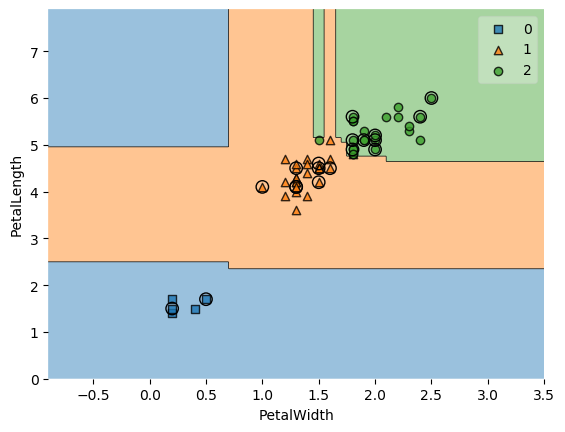

PyObject Text(24.000000000000007, 0.5, 'PetalLength')

In [14]:
using PyPlot    #重要!
mlp = pyimport("mlxtend.plotting")
fill_vals = Dict{Int,Float64}()
fill_rngs = Dict{Int,Float64}()
for ind in indices[3:end]
    fill_vals[ind-1] = mean(iris[!, names(iris)[ind]])
    fill_rngs[ind-1] = std(iris[!, names(iris)[ind]])
end
mlp.plot_decision_regions(X, y, forest, X_highlight=X_test, 
    feature_index=(indices[1:2].-1),
    filler_feature_values=fill_vals, filler_feature_ranges=fill_rngs)
xlabel(names(iris)[indices[1]])
ylabel(names(iris)[indices[2]])